<h5 style="color:#616D7E">Mohammad Sadegh Aghili &nbsp&nbsp&nbsp&nbsp&nbsp&nbsp 810100274</h5>

# CA3

## Part 2

#### 1. Why do samples need the same length?

Having samples of the same length is beneficial for various machine learning models, including Hidden Markov Models (HMMs), due to several reasons:

1.<b>Memory Efficiency:</b> Efficient memory allocation is achieved with fixed-size sequences, avoiding potential challenges with varying lengths.<br>
2.<b>Consistent Input Format:</b> Fixed-size sequences ensure a standardized input format, simplifying preprocessing for models.<br>
3.<b>Training and Inference Consistency:</b> Consistent sequence lengths facilitate batch processing, ensuring uniformity during both training and inference.<br>

#### 2. Why overlap the frames used in MFCC calculation?

Overlapping frames in the computation of Mel-Frequency Cepstral Coefficients (MFCCs) enhances temporal resolution, capturing detailed variations in audio signals. It ensures information continuity, reducing artifacts introduced by frame boundaries and contributing to the stability of extracted features. The practice mitigates aliasing effects, aligns with signal characteristics, and maintains consistency in feature extraction, crucial for tasks like speech recognition and music analysis.

#### 3. Why in most audio -related projects only 12 or 13 MFCC coefficients are used?

In audio-related projects, 12 or 13 Mel-Frequency Cepstral Coefficients (MFCCs) are commonly used due to their perceptual relevance and efficient representation of auditory characteristics. This smaller set of coefficients balances computational efficiency, data efficiency, and model robustness. The historical standardization of using 12 or 13 coefficients has proven effective across various applications like speech recognition and music analysis.

---------------------------------------------------------------------------------------------------------------------------------------------

#### 1. Explain what is meant by States and Observation? What are the states in this exercise and how is observation obtained?

<b>-States:</b> States in an HMM represent the hidden or unobservable aspects of the system being modeled. Each state represents a specific condition or situation, and the system transitions between these states over time.<br></br>
<b>-Observations:</b> Observations are the visible or measurable outcomes associated with each state. While the states are hidden, the observations are observable and provide information about the underlying state. Observations are generated based on the emission probabilities associated with each state.

#### 2. HMM models can be classified based on the degree of dependence between hidden states, the model you will implement in this exercise is a First-Order HMM model. 

<b>Nomenclature:</b> A First-Order HMM is often referred to as a "left-to-right" or "ergodic" model. In this model, transitions between states occur in a linear sequence from one state to the next. The transitions follow a left-to-right pattern, and self-transitions are allowed.<br>
<b>Features:</b> Key features of a First-Order HMM include a lack of loops or jumps between non-adjacent states. It is a simple and commonly used structure that represents a system evolving over time in a sequential manner.<br>
<b>Differences:<b> In contrast, other HMM models may allow more complex transitions, loops, or jumps between states, introducing a higher degree of flexibility in modeling. For example, a fully connected HMM allows transitions between any pair of states, providing a more general representation.

#### 3. Research about HMM and explain what phenomena this model is suitable for investigating and analyzing? Explain why this is the case.

<b>Phenomena Suitable for Investigation:</b> HMMs are suitable for investigating phenomena that exhibit temporal dependencies and sequential patterns. They are widely used in speech recognition, natural language processing, bioinformatics (e.g., DNA sequence analysis), and time-series analysis in general.<br><br>
<b>Why HMM is Suitable:</b> HMMs model systems where the current state depends only on the previous state (Markov property), making them effective for representing processes with inherent temporal structures. They are particularly useful when the underlying states are not directly observable but influence the observed outcomes.

#### 4. The HMM model, like any other model, has advantages and disadvantages that make it special. Examine the advantages and disadvantages of this model and briefly explain each one.

##### Advantages:
<b>Flexibility in Representation:</b> HMMs can model diverse sequential phenomena, offering flexibility in capturing dynamic structures.<br>
<b>Incorporation of Uncertainty:</b> They handle uncertainty by using probability distributions, making them suitable for systems with inherent randomness.</br>
<b>Learning from Data:</b> HMMs can be trained from data, allowing adaptation to specific observed sequences.
##### Disadvantages:

<b>Independence Assumption:</b> HMMs assume dependencies only on the previous state, limiting their ability to capture more distant history or global context.<br>
<b>Sensitivity to Parameters</b>: Performance is sensitive to model parameters, requiring careful selection for accurate modeling.<br>
<b>Difficulty with Long-Term Dependencies:</b> First-order HMMs may struggle with long-term dependencies due to their focus on sequential relationships.<br>


#### 5. There are different types of HMM models, research them and briefly review a few.

<b>First-Order HMM:</b> Transitions occur linearly from one state to the next.<br>
<b>Fully Connected HMM:</b> Allows transitions between any pair of states, providing a more general structure.<br>
<b>Tied-State HMM:</b> Shares parameters among multiple states to reduce the number of model parameters.<br>
<b>Continuous Observation HMM:</b> Assumes observations are continuous variables.<br>
<b>Hidden Semi-Markov Model (HSMM):</b> Allows states to emit observations for variable durations, suitable for modeling variable time lengths between state transitions.

---------------------------------------------------------------------------------------------------------------------------------------------

## Code:

In [20]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from scipy.io import wavfile
import seaborn as sns
import os

In [13]:
def extract_mfcc(file_path):
    y, sr = librosa.load(file_path, duration=30)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return mfccs

def extract_mfcc_from_folder(folder_path):
    mfccs_list = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".wav"):
            file_path = os.path.join(folder_path, file_name)
            mfccs = extract_mfcc(file_path)
            mfccs_list.append(mfccs)

    return mfccs_list

def plot_heatmap_for_folder(folder_path):
    mfccs_list = extract_mfcc_from_folder(folder_path)

    # Plot Heatmaps for each file in the folder
    for i, mfccs in enumerate(mfccs_list):
        plt.figure(figsize=(10, 4))
        sns.heatmap(mfccs, cmap='viridis', xticklabels=10)
        plt.title(f'MFCC Heatmap for {os.path.basename(folder_path)} - File {i+1}')
        plt.xlabel('Time')
        plt.ylabel('MFCC Coefficients')
        plt.show()
        # break

def plot_heatmap_for_folder(folder_path):
    mfccs_list = extract_mfcc_from_folder(folder_path)

    # Plot Heatmaps for each file in the folder
    for i, mfccs in enumerate(mfccs_list):
        plt.figure(figsize=(10, 4))
        sns.heatmap(mfccs, cmap='viridis', xticklabels=10)
        plt.title(f'MFCC Heatmap for {os.path.basename(folder_path)} - File {i+1}')
        plt.xlabel('Time')
        plt.ylabel('MFCC Coefficients')
        plt.show()
        # if i == 2:
        break

In [14]:
# Example usage:
pop_folder_path = "./data/pop"
metal_folder_path = "./data/metal"
hiphop_folder_path = "./data/hiphop"
blues_folder_path = "./data/blues"

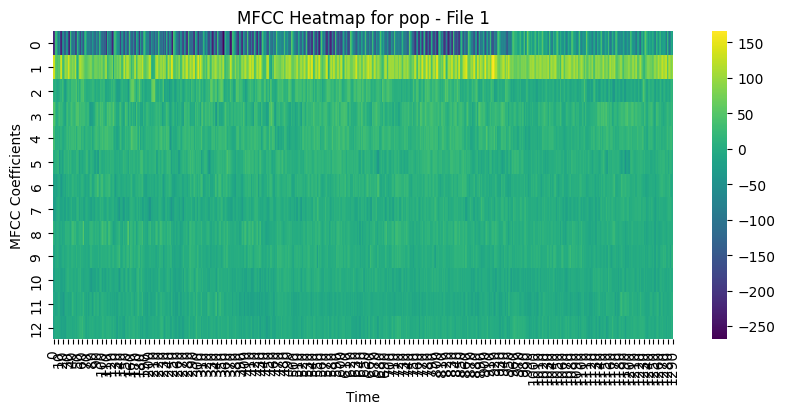

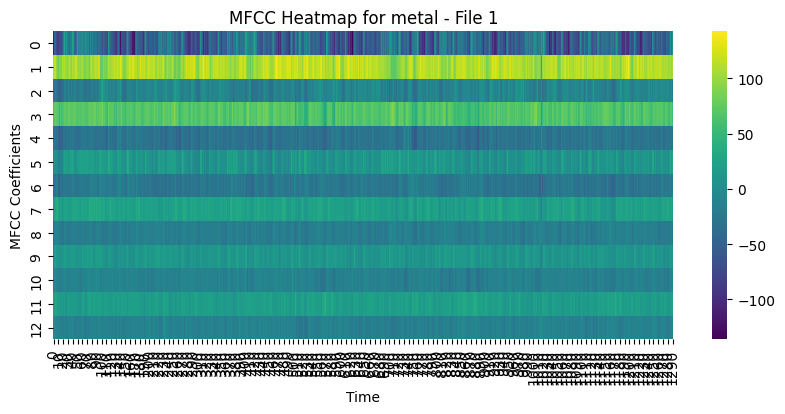

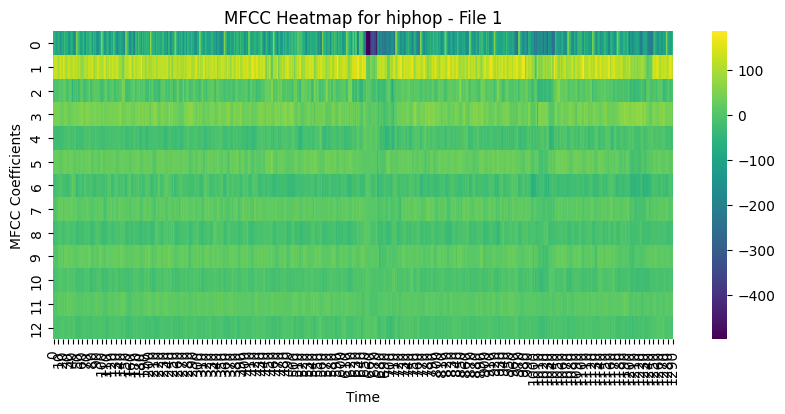

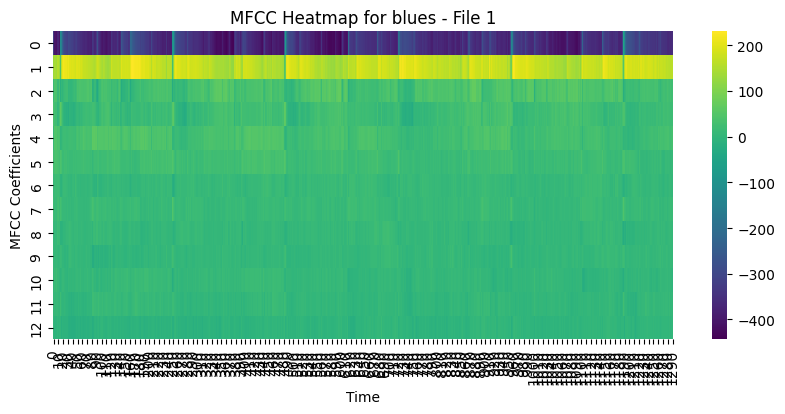

In [5]:
plot_heatmap_for_folder(pop_folder_path)
plot_heatmap_for_folder(metal_folder_path)
plot_heatmap_for_folder(hiphop_folder_path)
plot_heatmap_for_folder(blues_folder_path)

In [15]:
class HMM:
    def __init__(self, num_hidden_states):
        self.num_hidden_states = num_hidden_states
        self.rand_state = np.random.RandomState(1)

        self.initial_prob = self._normalize(self.rand_state.rand(self.num_hidden_states, 1))
        self.transition_matrix = self._stochasticize(self.rand_state.rand(self.num_hidden_states, self.num_hidden_states))

        self.mean = None
        self.covariances = None
        self.num_dimensions = None

    def _forward(self, observation_matrix):
        log_likelihood = 0.
        T = observation_matrix.shape[1]
        alpha = np.zeros(observation_matrix.shape)

        for t in range(T):
            if t == 0:
                # Initialization at the first time step
                alpha[:, t] = self.initial_prob.flatten() * observation_matrix[:, t]
            else:
                # Forward algorithm for the next time steps
                for j in range(self.num_hidden_states):
                    alpha[j, t] = np.sum(alpha[:, t-1] * self.transition_matrix[:, j]) * observation_matrix[j, t]

                alpha_sum = np.sum(alpha[:, t])

                # Check for zero division
                if alpha_sum != 0:
                    alpha[:, t] /= alpha_sum
                    log_likelihood += np.log(alpha_sum)

        return log_likelihood, alpha

    def _backward(self, observation_matrix):
        T = observation_matrix.shape[1]
        beta = np.zeros(observation_matrix.shape)

        # Initialization
        beta[:, -1] = 1.0

        # Backward algorithm for the remaining time steps
        for t in range(T - 2, -1, -1):
            for i in range(self.num_hidden_states):
                beta[i, t] = np.sum(self.transition_matrix[i, :] * observation_matrix[:, t+1] * beta[:, t+1])

            # Scaling to avoid numerical underflow
            beta_sum = np.sum(beta[:, t])

            # Check for zero division
            if beta_sum != 0:
                beta[:, t] /= beta_sum

        return beta

    def _state_likelihood(self, obs):
        obs = np.atleast_2d(obs)
        B = np.zeros((self.num_hidden_states, obs.shape[1]))

        for s in range(self.num_hidden_states):
            mean_s = self.mean[:, s]
            cov_s = self.covariances[:, :, s]

            B[s, :] = np.exp(-0.5 * np.sum((obs - mean_s[:, None]) * np.linalg.solve(cov_s, obs - mean_s[:, None]), axis=0))
            B[s, :] /= np.sqrt(np.linalg.det(cov_s) * (2 * np.pi) ** self.num_dimensions)

        return B

    def _normalize(self, x):
        return (x + (x == 0)) / np.sum(x)

    def _stochasticize(self, x):
        return (x + (x == 0)) / np.sum(x, axis=1)

    def _em_init(self, obs):
        if self.num_dimensions is None:
            self.num_dimensions = obs.shape[0]
        if self.mean is None:
            subset = self.rand_state.choice(np.arange(self.num_dimensions), size=self.num_hidden_states, replace=False)
            self.mean = obs[:, subset]
        if self.covariances is None:
            self.covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.num_hidden_states))
            self.covariances += np.diag(np.diag(np.cov(obs)))[:, :, None]

        return self

    def _em_step(self, obs):
        obs = np.atleast_2d(obs)
        T = obs.shape[1]

        # 1. Calculate emission probabilities using state likelihood
        B = self._state_likelihood(obs)

        # 2. Implement the forward algorithm
        log_likelihood, alpha = self._forward(B)

        # Check for NaN or Inf in alpha and handle accordingly
        alpha[np.isnan(alpha)] = 0
        alpha[np.isinf(alpha)] = 0

        # 3. Implement the backward algorithm
        beta = self._backward(B)

        # Check for NaN or Inf in beta and handle accordingly
        beta[np.isnan(beta)] = 0
        beta[np.isinf(beta)] = 0

        xi_sum = np.zeros((self.num_hidden_states, self.num_hidden_states))
        gamma = np.zeros((self.num_hidden_states, T))

        for t in range(T - 1):
            # Calculate numerator for xi (transition probabilities)
            numerator = np.zeros((self.num_hidden_states, self.num_hidden_states))
            for i in range(self.num_hidden_states):
                for j in range(self.num_hidden_states):
                    numerator[i, j] = alpha[i, t] * self.transition_matrix[i, j] * B[j, t + 1] * beta[j, t + 1]

            # Update xi_sum with the numerator
            xi_sum += self._normalize(numerator)

            # Calculate gamma (state occupation probabilities)
            gamma[:, t] = np.sum(xi_sum, axis=1)

        # Normalize the last column of gamma
        gamma[:, -1] = self._normalize(alpha[:, -1])

        # Update model parameters
        expected_prior = gamma[:, 0]
        expected_transition = self._stochasticize(xi_sum)
        expected_covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.num_hidden_states))
        expected_covariances += 0.01 * np.eye(self.num_dimensions)[:, :, None]

        gamma_state_sum = np.sum(gamma, axis=1)
        gamma_state_sum = gamma_state_sum + (gamma_state_sum == 0)

        expected_mean = np.zeros((self.num_dimensions, self.num_hidden_states))
        for s in range(self.num_hidden_states):
            gamma_obs = obs * gamma[s, :]
            expected_mean[:, s] = np.sum(gamma_obs, axis=1) / gamma_state_sum[s]

        self.initial_prob = expected_prior
        self.mean = expected_mean
        self.covariances = expected_covariances
        self.transition_matrix = expected_transition

        return log_likelihood


    def train(self, obs, num_iterations=1):
        for i in range(num_iterations):
            self._em_init(obs)
            self._em_step(obs)
        return self

    def score(self, obs):
        B = self._state_likelihood(obs)
        log_likelihood, _ = self._forward(B)
        return log_likelihood


In [ ]:
hmm_models = []
genres = ["pop", "blues", "hiphop", "metal"]
for genre in genres:
    train_folder_path = f"./data/{genre}"
    train_mfccs_list = extract_mfcc_from_folder(train_folder_path)
    num_hidden_states = 3
    hmm_models = HMM(num_hidden_states=num_hidden_states)
    train_obs = np.concatenate(train_mfccs_list, axis=1)
    hmm_model.train(train_obs, num_iterations=10)
    hmm_models.append((genre, hmm_model))

In [ ]:
genres = ["pop", "blues", "hiphop", "metal"]

hmm_models = []

for genre in genres:
    folder_path = f"./data/{genre}"
    all_mfccs_list = extract_mfcc_from_folder(folder_path)
    train_mfccs_list = all_mfccs_list[:int(0.8 * len(all_mfccs_list))]
    test_mfccs_list = all_mfccs_list[int(0.8 * len(all_mfccs_list)):]
    num_hidden_states = 3
    hmm_model = HMM(num_hidden_states=num_hidden_states)
    train_obs = np.concatenate(train_mfccs_list, axis=1)
    hmm_model.train(train_obs, num_iterations=10)
    hmm_models.append((genre, hmm_model))

for genre, trained_hmm_model in hmm_models:
    test_mfccs_list = all_mfccs_list[int(0.8 * len(all_mfccs_list)):]

    for i, test_mfccs in enumerate(test_mfccs_list):
        test_obs = np.concatenate([test_mfccs], axis=1)
        likelihood = trained_hmm_model.score(test_obs)
        print(f"Predicted Genre for {genre} Test File {i+1}: {likelihood}")

In [16]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm = confusion_matrix(real_labels, pred_labels)
np.set_printoptions(precision=2)
classes = ["pop", "hiphop", "metal", "blues"]
plt.figure()
plot_confusion_matrix(cm, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------

#### 1. Explain how each criterion evaluates the model.

##### Accuracy:
-Evaluation: Measures the overall correctness of predictions by dividing the number of correct predictions by the total number of predictions.<br>
-Formula: (True Positives + True Negatives) / (Total Predictions)<br>
##### Precision:
-Evaluation: Assesses the accuracy of positive predictions, focusing on the proportion of true positive predictions among all positive predictions.<br>
-Formula: True Positives / (True Positives + False Positives)<br>
##### Recall:
-Evaluation: Measures the model's ability to capture all relevant instances of the positive class, emphasizing the proportion of true positives among all actual positives.<br>
-Formula: True Positives / (True Positives + False Negatives)<br>
##### F1 Score:
-Evaluation: Balances precision and recall, providing a single metric that considers both false positives and false negatives.<br>
-Formula: 2 * (Precision * Recall) / (Precision + Recall)<br>

#### 2. State the difference between Recall and Precision and explain why each one alone is not sufficient for model evaluation? For each, give an example where this criterion has a high value but the model does not perform well.

Recall (Sensitivity): Emphasizes capturing all actual positives, minimizing false negatives.<br>
Precision: Focuses on accuracy of positive predictions, minimizing false positives.<br><br>

Recall Alone Not Sufficient: High recall may lead to more false positives, affecting precision and accuracy.<br>
Precision Alone Not Sufficient: High precision may miss true positives, impacting recall and accuracy.<br><br>

Example Scenarios:<br>
High Recall, Poor Precision Example: Medical diagnosis for a rare disease, identifying many positives but with significant false positives.
High Precision, Poor Recall Example: Email spam filter, correctly identifying most spam but missing actual spam emails.
Balanced Precision and Recall Example: Credit card fraud detection, identifying most frauds while maintaining accuracy in positive predictions.

#### 3. What kind of averaging does the F1 criterion use? What is the difference between this type of averaging and normal averaging and why is it important here?

The F1 criterion employs harmonic mean averaging for precision and recall, emphasizing a balance between the two metrics. Unlike arithmetic mean averaging, the harmonic mean gives more weight to smaller values, making F1 Score sensitive to situations where either precision or recall is low. This weighting is crucial in model evaluation, ensuring a comprehensive assessment of a model's performance in scenarios where false positives and false negatives carry equal significance.

#### 4. As you know, we have more than 2 classes in this problem, research about Multi-Class Metrics and describe the three averaging modes Macro, Micro and Weighted.

<b>Macro-Averaging:</b> Treats all classes equally and provides an unweighted average, suitable for scenarios where class imbalance is not a major concern.<br>
<b>Micro-Averaging:</b> Considers each instance equally, making it useful for imbalanced datasets, but might not reflect performance on minority classes as much.<br>
<b>Weighted-Averaging:</b> Takes class imbalance into account by assigning weights based on the number of instances, offering a balanced evaluation that considers both overall and class-specific performance.

#### 7. Your results may be different in the first and second part and the ready model (which you used in the first part hmmlearn) may have different results and higher accuracy than the model designed by you. What are the reasons for this difference? Research the factors influencing these differences carefully.

Differences in results between the ready model (hmmlearn) and the manually designed Hidden Markov Model (HMM) can stem from various factors. These include variations in model complexity, parameter initialization, training data diversity, training algorithms, hyperparameter tuning, data pre-processing, and library-specific implementations. The ready model may benefit from optimized structures, sophisticated algorithms, and extensive hyperparameter tuning, contributing to potential differences in accuracy and performance compared to the manually designed model.